In [86]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randrange


There exists a Mean Squared Error Loss function |x - x̂|². We want you to
experiment with different types of loss functions. Consider the following loss
functions:
- a. |x - x̂|³
- b. |x - x̂|

Below power is defined accordingly
<br>
Assume(n > 0)

In [87]:
power = 1

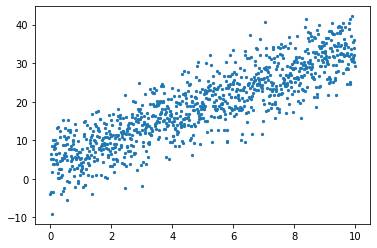

In [88]:
np.random.seed(1)
slope = np.random.randint(0, 5)
intercept = np.random.randint(0, 5)
X = np.arange(0, 10, 0.01)
Y = [(slope * x + intercept) + np.random.normal(scale=5) for x in X]
plt.scatter(X, Y,s=5)
plt.show()

In [89]:
def calculate_error(y_hat, y):
    """
   loss function:
   |x - x̂|
     error between target, y, and prediction y_hat.
    """
    error = 0.5 * (y - y_hat) ** power
    return abs(error)
def calc_mean_error(y_hats, Y):
    error = np.mean([calculate_error(y_hat, y) for y_hat, y in zip(y_hats, Y)])
    return error

In [90]:
 # Two random parameters
# para[0]  =slope of line
# para[1]  =  y intercept
para=[0,0]
para[0]=0
para[1]=0

In [91]:
def predicts(m, c ,X):
        #print([m * x + c for x in X])
        return [m * x + c for x in X]
y_hats = predicts(para[0],para[1],X)

In [92]:
def gradient_step(m, c, X, Y, eta=0.001):
    """
    loss function:
   |x - x̂|
     error between target, y, and prediction y_hat.
    """
    para[0] = m
    para[1] = c
    N = len(X)
    my_list = [0 , 0]
    numpy_array = np.array(my_list, dtype=np.float64) 
    for x, y in zip(X, Y):
        #grad_m += - (1/N) * x * (y - (para[0] * x + para[1])) 
        #grad_b += - (1/N) * (y - (para[0] * x + para[1]))
        numpy_array[0] += - (1/N) * (y - (para[0] * x + para[1])) * x
        numpy_array[1] += - (1/N) * (y - (para[0] * x + para[1]))
    new_m = para[0] - (eta * numpy_array[0])
    new_b = para[1] - (eta * numpy_array[1])
    
    return new_m, new_b

In [93]:
my_list = [0 , 0]
numpy_array = np.array(my_list, dtype=np.float64)
print(numpy_array[0])

0.0


In [94]:
para[0], para[1] = gradient_step(para[0], para[1], X, Y)

In [95]:
y_hats = predicts(para[0], para[1], X)

In [96]:
errors = []

for _ in range(1000):
    para[0], para[1] = gradient_step(para[0], para[1], X, Y)
    y_hats = predicts(para[0], para[1], X)
    error = calc_mean_error(y_hats, Y)
    errors.append(error)

In [97]:
y_hats = predicts(para[0], para[1], X)

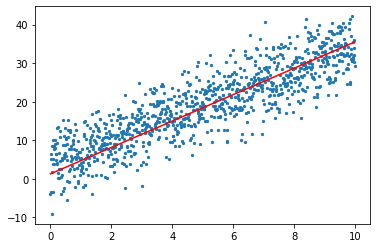

In [100]:
plt.scatter(X, Y,s=5)
plt.plot(X, y_hats, c='r')
plt.show()

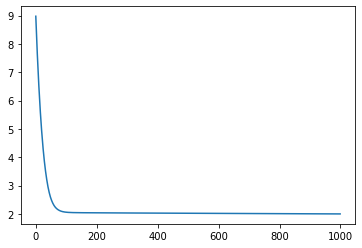

In [101]:

plt.plot(errors)

plt.show()